In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [152]:
df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv",sep=',')

importing the csv file

In [153]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


exploring the data

In [154]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

checking out the number of categories in other field1

In [155]:
df.shape

(908, 25)

checkinh out the shape of dataframe

In [156]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

checking out the number of columns the dataframe has

In [157]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


checking out all the statistical measures using describe function

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

checking out the information of the dataframe

In [159]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

checking out the null values inside the dataframe

In [160]:
df.drop(columns = ['wepp_id','url','country_long'],axis = 1,inplace = True)

droping out some unnecessary columns

<AxesSubplot:xlabel='commissioning_year'>

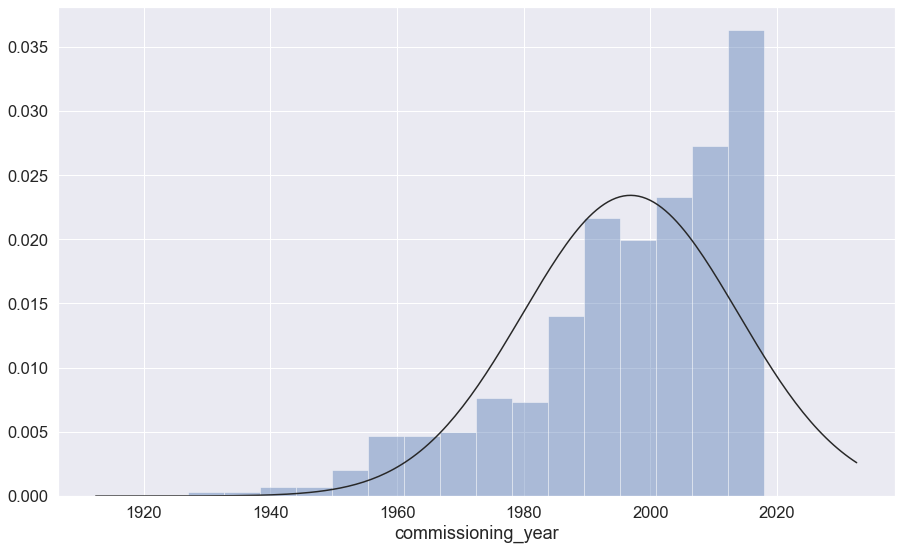

In [161]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.commissioning_year, kde=False, fit=norm)

checking out the distribution of the column commissioning_year and this columns seems like its right skewed

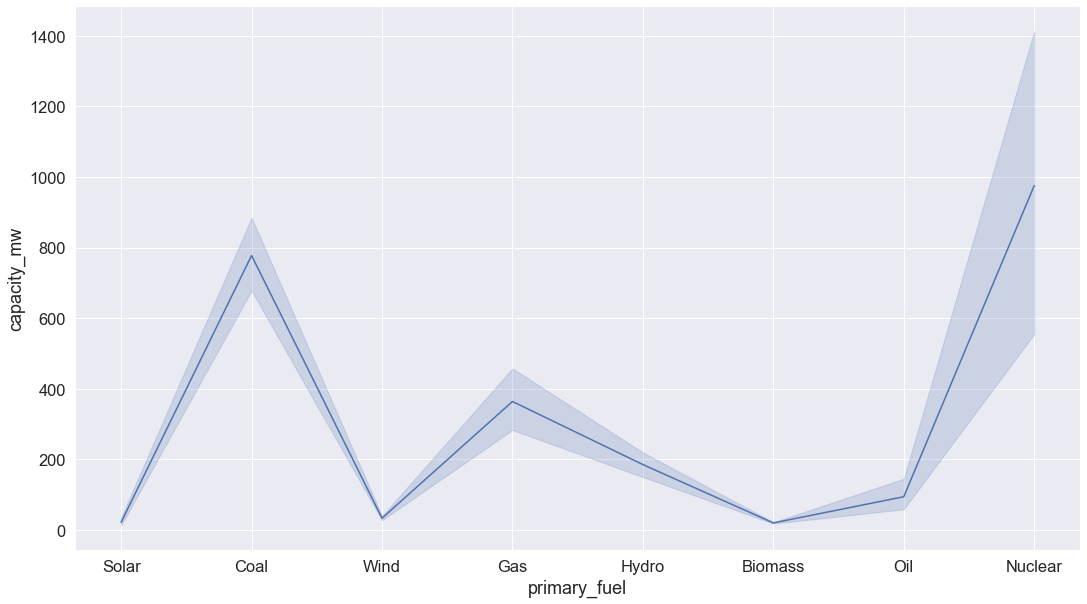

In [162]:
plt.figure(figsize=(18,10))
sns.lineplot(x="primary_fuel", y="capacity_mw", data=df)
plt.show()

above graph shows that which gas is producing what amount of electrical generating capacity and seems like coal is used to  producing huge amount of electricity and then wind and at last the gas

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

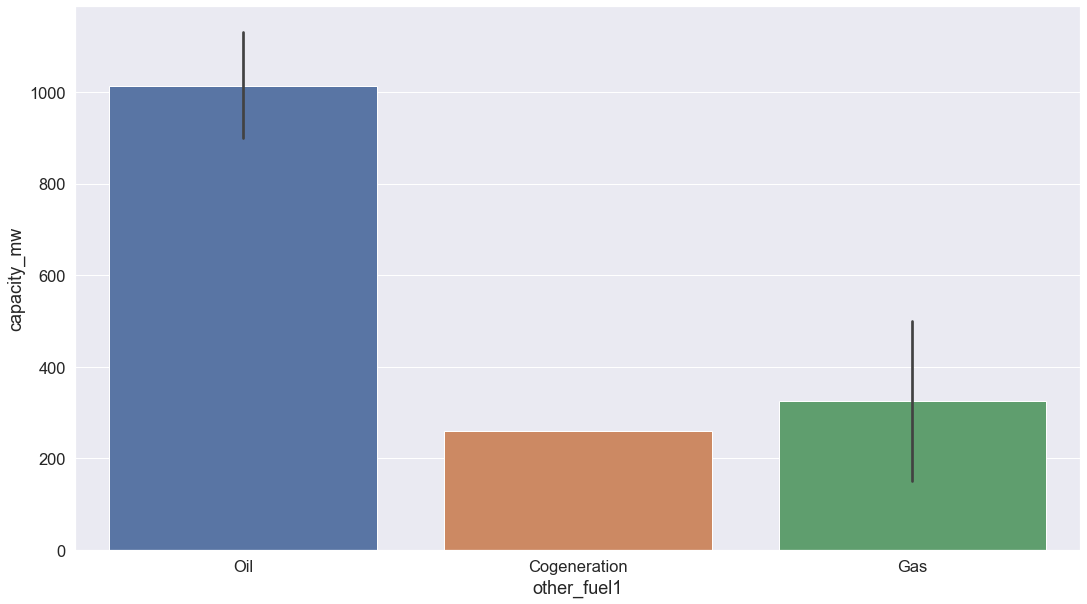

In [163]:
plt.figure(figsize=(18,10))
sns.barplot(x = 'other_fuel1',y = 'capacity_mw',data = df)

the above garph shows that which fuels are used to produce what amount of electrical generation and it seems like oil is highly used to generate electricity and then gas and congeneration is used very less

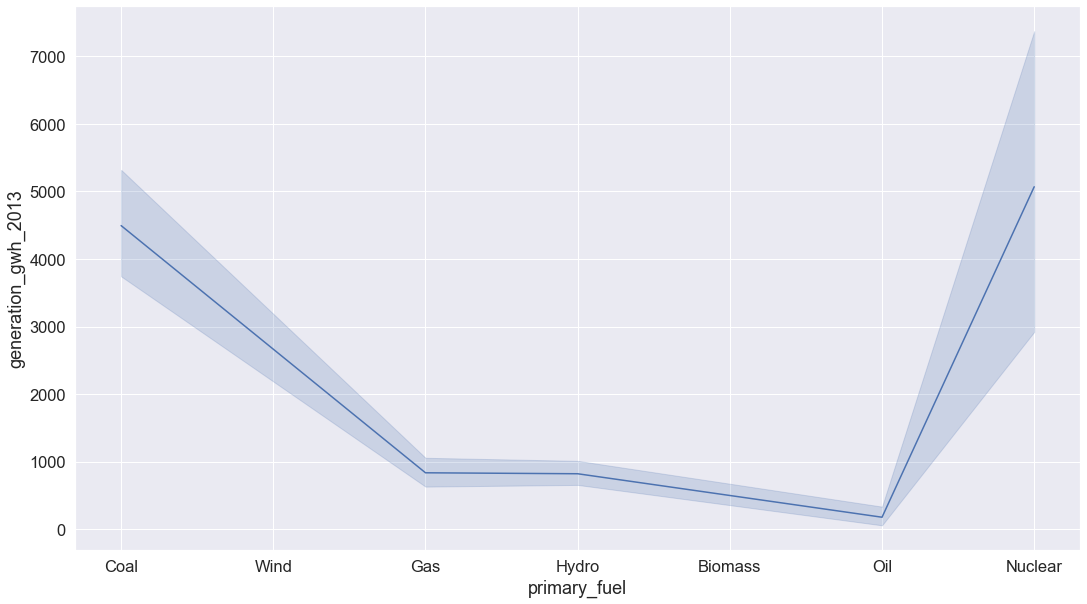

In [164]:
plt.figure(figsize=(18,10))
sns.lineplot(x = 'primary_fuel',y = 'generation_gwh_2013',data = df)
plt.show()

the above graph shows the amount of electricity generated by different primary fuels

In [165]:
df['primary_fuel'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
903     Coal
904    Solar
905     Wind
906     Coal
907     Wind
Name: primary_fuel, Length: 908, dtype: object>

Text(0.5, 1.0, 'electricity generation by other fuels')

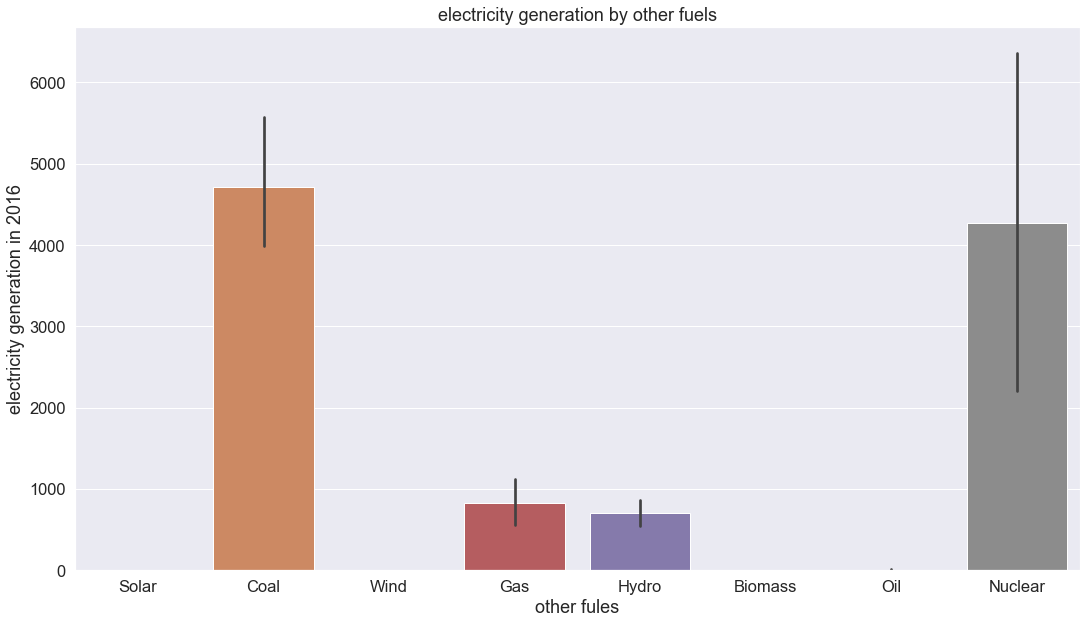

In [166]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x="primary_fuel", y="generation_gwh_2016")
plt.xlabel('other fules')
plt.ylabel('electricity generation in 2016')
plt.title('electricity generation by other fuels')

the baove graph shows the amount of electricity generated by other fuels and seems like coal is used produce huge amount of electricity

In [167]:
from sklearn.preprocessing import LabelEncoder

cols = ['country', 'gppd_idnr', 'primary_fuel','other_fuel1','other_fuel2','commissioning_year','owner','generation_data_source','year_of_capacity_data',
       'geolocation_source','source','name']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,0,0,658,2.5,28.1839,73.2407,6,3,1,NaN,...,109,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,1,520,98.0,24.7663,74.6090,1,3,1,NaN,...,174,2,1,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,2,854,39.2,21.9038,69.3732,7,3,1,NaN,...,21,2,1,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,3,0,135.0,23.8712,91.3602,2,3,1,NaN,...,22,2,0,631.777928,617.789264,843.747,886.004428,663.774500,0,NaN
4,0,4,1,1800.0,21.9603,82.4091,1,2,1,NaN,...,22,2,0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0,NaN


here i used label encoder to label all the categorical variables

In [168]:
col = ['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014',
      'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
df[col] = df[col].fillna(df[col].mean())

dealing with NaN in continuous values

In [169]:
col = ['other_fuel1','generation_data_source']
df[col] = df[col].fillna(df[col].mode())

dealing with NaN in categorical values

In [170]:
col = ['estimated_generation_gwh','other_fuel3','other_fuel2']
df[col] = df[col].replace(np.nan, 0)

dealing with NaN and replacing with 0

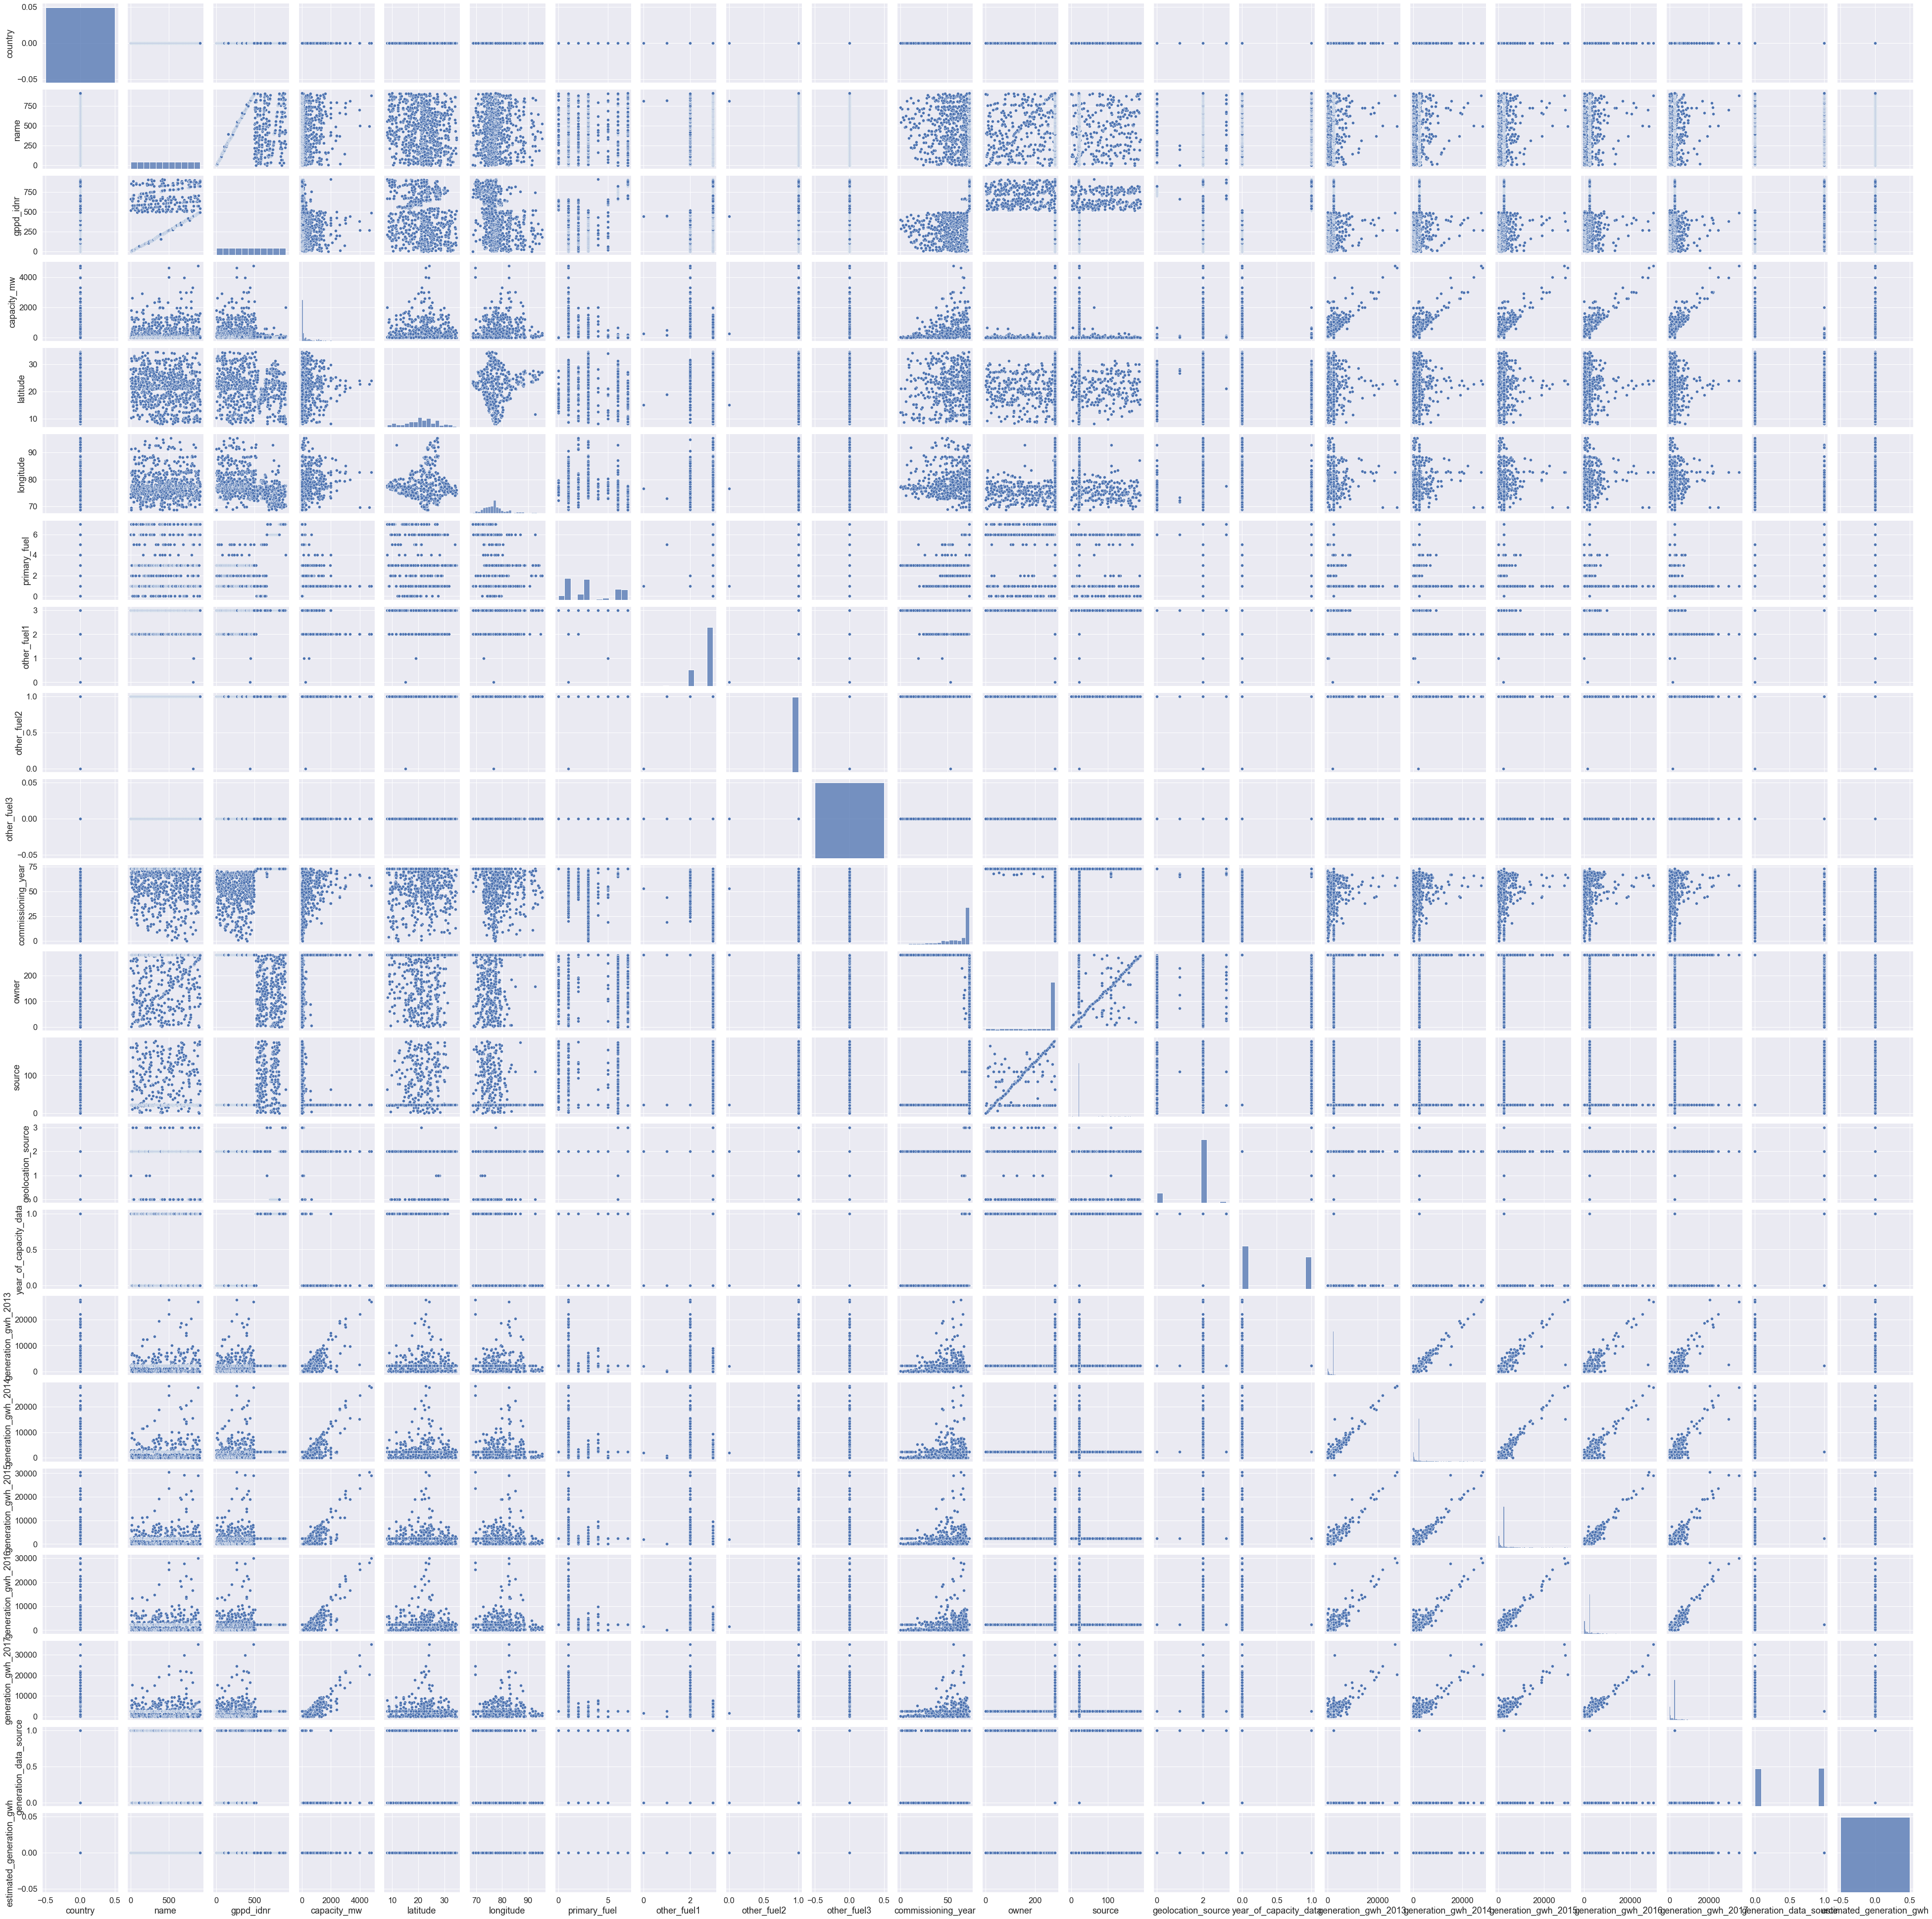

In [171]:
sns.pairplot(df)

here i used pair plot to show the relationship between the columns

In [172]:
df.skew()

country                      0.000000
name                         0.000000
gppd_idnr                    0.000000
capacity_mw                  3.193257
latitude                    -0.147391
longitude                    1.129836
primary_fuel                 0.471141
other_fuel1                 -1.619441
other_fuel2                -30.133038
other_fuel3                  0.000000
commissioning_year          -1.412618
owner                       -1.375607
source                       1.829145
geolocation_source          -1.922080
year_of_capacity_data        0.294357
generation_gwh_2013          5.241491
generation_gwh_2014          5.041961
generation_gwh_2015          5.367370
generation_gwh_2016          5.071758
generation_gwh_2017          5.111938
generation_data_source      -0.017651
estimated_generation_gwh     0.000000
dtype: float64

here i tried to check the skewness across the column and we can see the skewness across the columns

In [173]:
skew = ['capacity_mw','longitude','source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
       'generation_gwh_2016','generation_gwh_2017','year_of_capacity_data']
for col in skew:
    if df.skew().loc[col]>0.055:
        df[col] = np.log1p(df[col])

here i tried to remove the skewness

In [174]:
df.skew()

country                      0.000000
name                         0.000000
gppd_idnr                    0.000000
capacity_mw                  0.125029
latitude                    -0.147391
longitude                    0.924113
primary_fuel                 0.471141
other_fuel1                 -1.619441
other_fuel2                -30.133038
other_fuel3                  0.000000
commissioning_year          -1.412618
owner                       -1.375607
source                       0.868165
geolocation_source          -1.922080
year_of_capacity_data        0.294357
generation_gwh_2013         -2.699707
generation_gwh_2014         -2.589757
generation_gwh_2015         -2.311574
generation_gwh_2016         -2.269502
generation_gwh_2017         -2.278767
generation_data_source      -0.017651
estimated_generation_gwh     0.000000
dtype: float64

here we can see all the skewness is gone

# Plotting outliers

country                         AxesSubplot(0.125,0.71587;0.0945122x0.16413)
name                         AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
gppd_idnr                    AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
capacity_mw                  AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
latitude                     AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
longitude                    AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
primary_fuel                 AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
other_fuel1                    AxesSubplot(0.125,0.518913;0.0945122x0.16413)
other_fuel2                 AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
other_fuel3                 AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
commissioning_year          AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
owner                       AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
source                      AxesSubplot(0.692073,0.518913;0.0945122x0.16413)

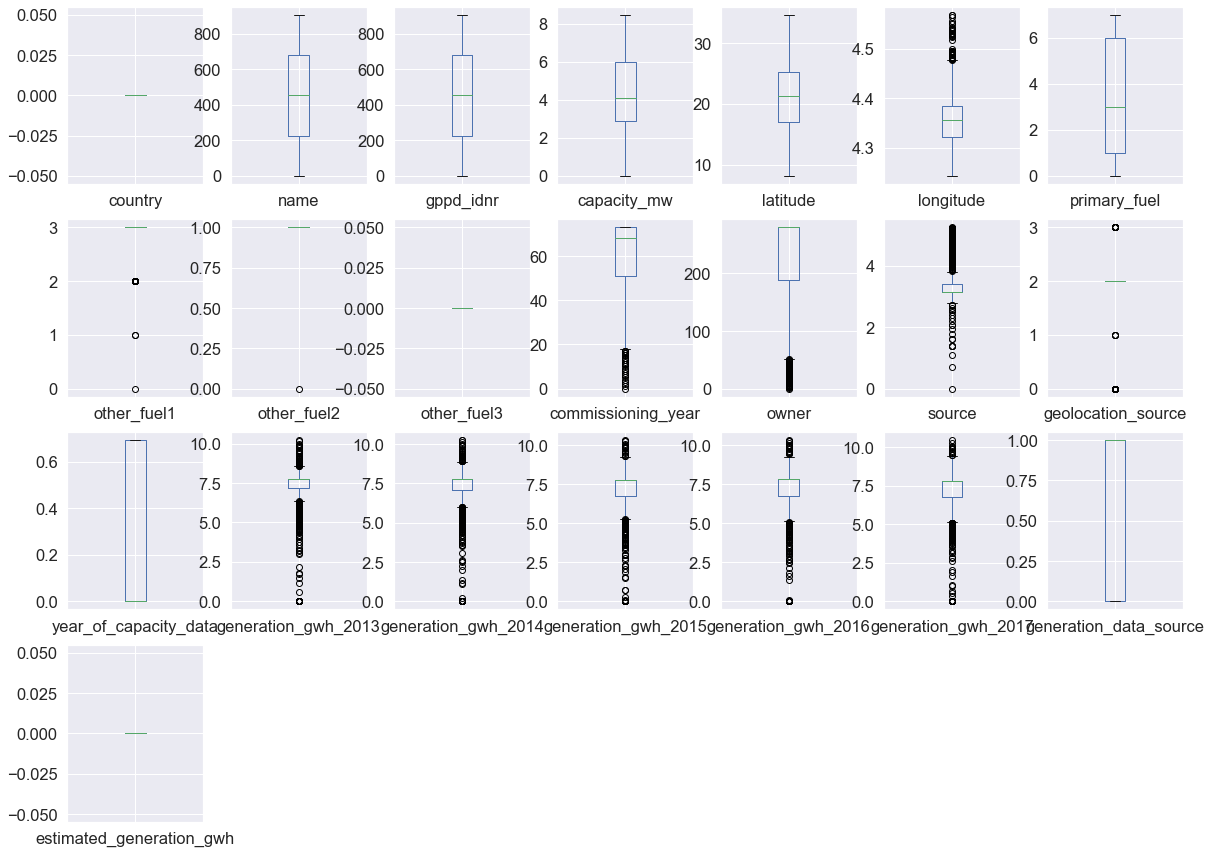

In [175]:
df.plot(kind = 'box',subplots = True,layout=(4,7),figsize = (20,15))

here tried to show is there any outliers present across the columns and we could see there is outliers present so we try to minimise the outliers

# Applying IQR method

In [176]:
dfcontcol = df.drop(columns = ['other_fuel1','generation_data_source','estimated_generation_gwh','other_fuel3','other_fuel2','name','country',
                              'primary_fuel','source',],axis = 1)

In [177]:
dfcontcol.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'commissioning_year', 'owner', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [178]:
# finding out the quantile of data with continuous columns
Q1 = dfcontcol.quantile(0.25)
Q3 = dfcontcol.quantile(0.75)
IQR = Q3 - Q1

# removing outliers using IQR method
df_new = df[~((dfcontcol < (Q1 - 1.5 * IQR)) |(dfcontcol > (Q3 + 1.5 * IQR))).any(axis=1)]

here i applied IQR methos to minimise the outliers

In [179]:
print(df_new.shape)
print(df.shape)

(421, 22)
(908, 22)


here i can see we have minimised the outliers

<AxesSubplot:>

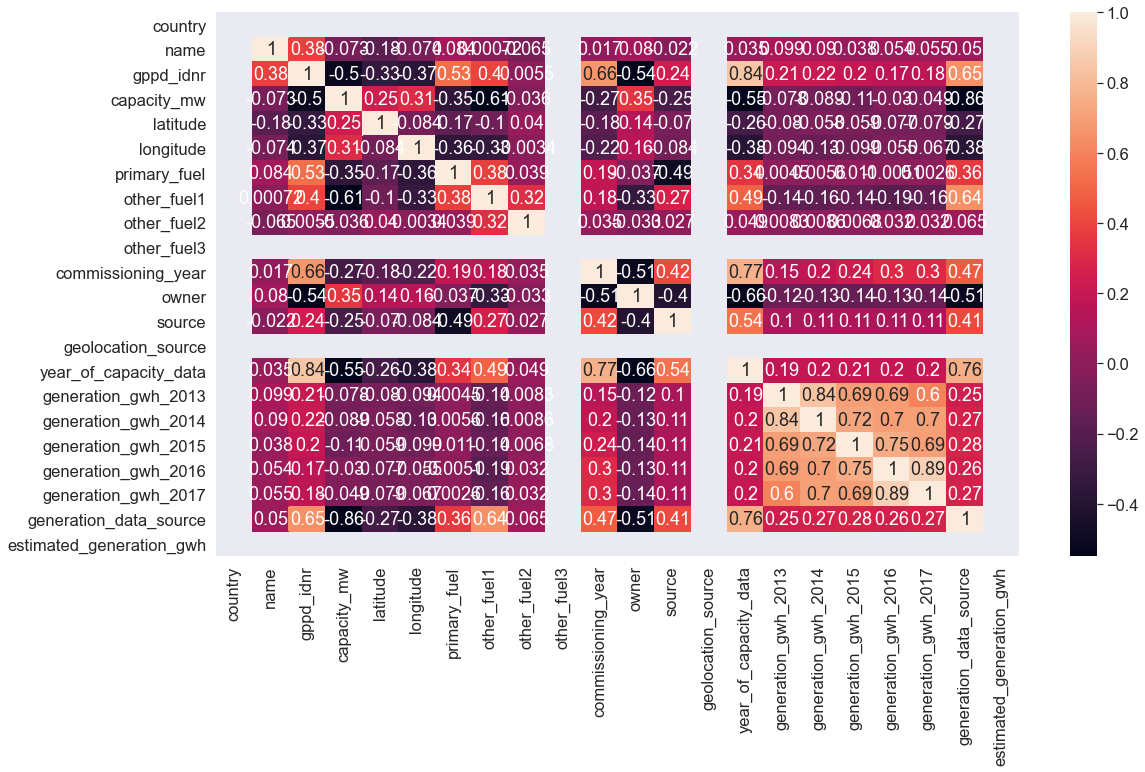

In [180]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot = True,robust = True)

here i ploted the heatmap to show multicolinearity across the columns

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

                     feature           VIF
0                    country           NaN
1                       name      2.287499
2                  gppd_idnr     10.932240
3                capacity_mw      5.322362
4                   latitude      1.239768
5                  longitude      1.405842
6               primary_fuel      8.814910
7                other_fuel1      3.716955
8                other_fuel2      1.293961
9                other_fuel3           NaN
10        commissioning_year      3.188891
11                     owner      2.578867
12                    source      8.562372
13        geolocation_source  15783.602510
14     year_of_capacity_data     17.681705
15       generation_gwh_2013      4.118216
16       generation_gwh_2014      4.688393
17       generation_gwh_2015      2.884511
18       generation_gwh_2016      6.863689
19       generation_gwh_2017      5.547685
20    generation_data_source     10.993344
21  estimated_generation_gwh           NaN


here i used vif to see the amount of multicolinearity present across the columns

In [182]:
df_new.drop(columns = ['geolocation_source'],axis = 1,inplace = True)

here i dropped grolocation source columns because its showing highest amount of multicolinearity

# primary_fuel

## Preprocessing

In [223]:
# now split the data into feature and target variables
x = df_new.drop(columns = ['primary_fuel','capacity_mw'])
y = df_new[['primary_fuel']]

In [224]:
print(x.shape)
print(y.shape)

(421, 19)
(421, 1)


here i splited the data into x and y

In [225]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

here i used standard scalar to scale the feature column

In [226]:
from sklearn.model_selection import train_test_split
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .25,random_state = 0)

here i split the data into training and testing set

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

here i imported all the necessary models library

In [228]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
model = [lr,rfc,dt,knn]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression() is 0.8679245283018868
[[ 8  2  0  0  0  0  0]
 [ 2 30  0  0  0  0  0]
 [ 0  1  2  4  0  0  0]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 1  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.83      0.94      0.88        32
           2       1.00      0.29      0.44         7
           3       0.86      1.00      0.93        25
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           7       0.96      1.00      0.98        27

    accuracy                           0.87       106
   macro avg       0.63      0.57      0.57       106
weighted avg       0.84      0.87      0.84       106

Accuracy score of RandomForestClassifier() is 0.8773584905660378
[[ 8  2  0  0  0  0  0]
 [ 2 30  0  0  0  0  0]
 [ 0  1  3  3  0  0  0]
 [ 0  0  0 25  0  0  0]
 [ 0  0  0  

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [229]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =10)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.665060908084164
cv score of RandomForestClassifier() is 0.8694905869324474
cv score of DecisionTreeClassifier() is 0.7936323366555924
cv score of KNeighborsClassifier() is 0.5414174972314507


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like Randomforest is giving the close score

# Hyperparameter Tuning

In [189]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

                'max_features': ['auto', 'sqrt'],

                'min_samples_leaf': [1, 2, 4],

                'min_samples_split': [2, 5, 10]}
rfc2= RandomForestClassifier()
clf = GridSearchCV(estimator = rfc2,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [190]:
rfc2 = RandomForestClassifier(max_depth= 20,
                         max_features = 'sqrt',
                         min_samples_leaf = 1,
                         min_samples_split = 2)
rfc2.fit(x_train,y_train)
print(rfc2.score(x_train,y_train))
print(rfc2.score(x_test,y_test))

1.0
0.8773584905660378


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy

In [230]:
pred_final3 = rfc2.predict(x_test)
print(accuracy_score(y_test,pred_final3))

0.8773584905660378


and here is our final predicting accuracy on testing set

# Now we dump the final output

In [192]:
import pickle
filename = 'global_power_plant.pkl'
pickle.dump(rfc2,open(filename,'wb'))

# capacity_mw

In [204]:
# now split the data into feature and target variables
x2 = df_new.drop(columns = ['capacity_mw','primary_fuel'])
y2 = df_new['capacity_mw']

here i split the new dataset into x an y

In [205]:
print(x2.shape)
print(y2.shape)

(421, 19)
(421,)


here i checked the shape of x an y

In [206]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x2_scaled = sc.fit_transform(x2)

here i used standard scalar to scale the feature columns

In [207]:
# spliting the data into train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2_scaled,y2,test_size = .25,random_state = 0)

here i split the feature variable and target variable into training and test set

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [209]:
lr = LinearRegression()
rfr = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

model = [lr,rfr,dt,knn]

for i in model:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    print('training score: ',i,'is',i.score(xtrain,ytrain))
    print('testing score: ',i,'is',i.score(xtest,ytest))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(ytest,pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(ytest,pred))
    # report performance
    
    
    print('\n')

training score:  LinearRegression() is 0.8419892422194397
testing score:  LinearRegression() is 0.7283839903633345
Mean squared error:  LinearRegression() is 0.9878095718281797
Coefficient of determination:  LinearRegression() is 0.7283839903633345


training score:  RandomForestRegressor() is 0.9769769723826829
testing score:  RandomForestRegressor() is 0.7483209475704848
Mean squared error:  RandomForestRegressor() is 0.9153031051118176
Coefficient of determination:  RandomForestRegressor() is 0.7483209475704848


training score:  DecisionTreeRegressor() is 1.0
testing score:  DecisionTreeRegressor() is 0.6024396984904845
Mean squared error:  DecisionTreeRegressor() is 1.4458421347670958
Coefficient of determination:  DecisionTreeRegressor() is 0.6024396984904845


training score:  KNeighborsRegressor() is 0.868266741578934
testing score:  KNeighborsRegressor() is 0.7057081863130299
Mean squared error:  KNeighborsRegressor() is 1.0702766411285285
Coefficient of determination:  KNeigh

Looks like Decisiontree model is working good with mse 0.54 so we move ahead with Decision tree

In [210]:
dt2 = DecisionTreeRegressor() 
dt2.fit(xtrain,ytrain)

print(dt2.score(xtrain,ytrain))
print(dt2.score(xtest,ytest))

pred2 = dt2.predict(xtest)

1.0
0.6094451609320808


here i used decision tree for the final output

In [211]:
compare = pd.DataFrame({'actual value':ytest,
                       'predicted value':pred2})
compare.head(20)

,actual value,predicted value
273,5.602119,5.525453
749,2.442347,2.442347
42,6.111467,6.293419
213,5.739793,5.262690
289,6.985642,7.046212
374,7.579168,6.511745
17,6.398595,3.044522
562,4.634729,3.481240
409,3.081910,2.772589
674,3.586293,5.017280


here i compared the actual data and predicted data

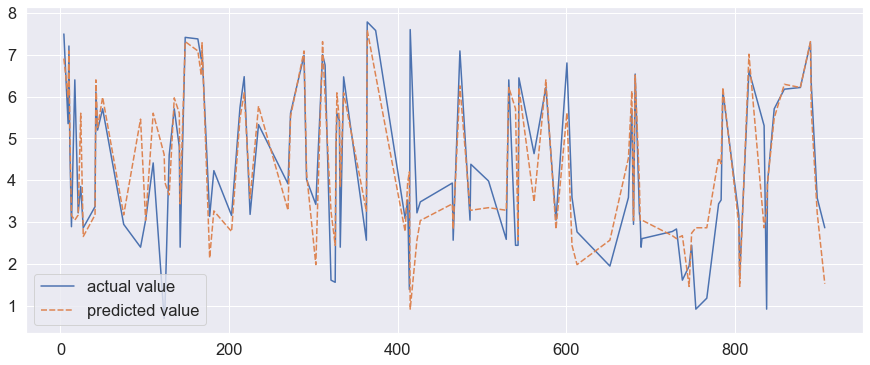

In [201]:
# checking out the differnce between actual and predicted values
plt.figure(figsize=(15,6))
sns.lineplot(data=compare)
  
# displaying the plot
plt.show()

here i ploted the actual and predicted data

# Now we dump the final output

In [202]:
import pickle
filename = 'global_power_plant2.pkl'
pickle.dump(dt2,open(filename,'wb'))